In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
data = pd.read_csv("mushrooms.csv")

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data.shape

(8124, 23)

In [7]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


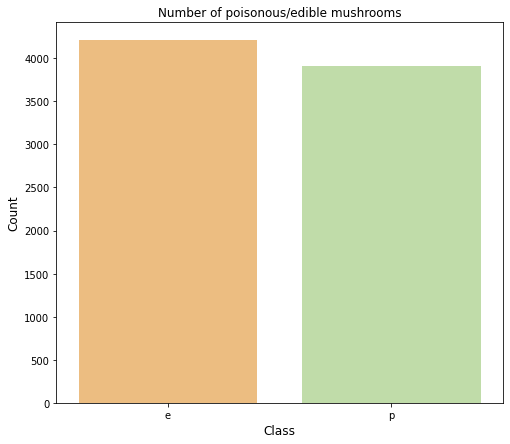

In [8]:
count = data['class'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=1, palette="Spectral")
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')
plt.show()

##The dataset is a balanced dataset

In [9]:
data = data.astype('category')

In [10]:
data.dtypes

class                       category
cap-shape                   category
cap-surface                 category
cap-color                   category
bruises                     category
odor                        category
gill-attachment             category
gill-spacing                category
gill-size                   category
gill-color                  category
stalk-shape                 category
stalk-root                  category
stalk-surface-above-ring    category
stalk-surface-below-ring    category
stalk-color-above-ring      category
stalk-color-below-ring      category
veil-type                   category
veil-color                  category
ring-number                 category
ring-type                   category
spore-print-color           category
population                  category
habitat                     category
dtype: object

In [11]:
labelencoder=LabelEncoder()
for column in data.columns:
    data[column] = labelencoder.fit_transform(data[column])

In [12]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [13]:
data['veil-type']

0       0
1       0
2       0
3       0
4       0
       ..
8119    0
8120    0
8121    0
8122    0
8123    0
Name: veil-type, Length: 8124, dtype: int64

In [14]:
data['veil-type'].unique()

array([0])

##The column "veil-type" has only one value - 0 and does not contribute to the data, so we remove it.

In [15]:
data=data.drop(["veil-type"],axis=1)

#Exploratory Data Analysis

##Distribution of the Features

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]), <a list of 21 Text major ticklabel objects>)

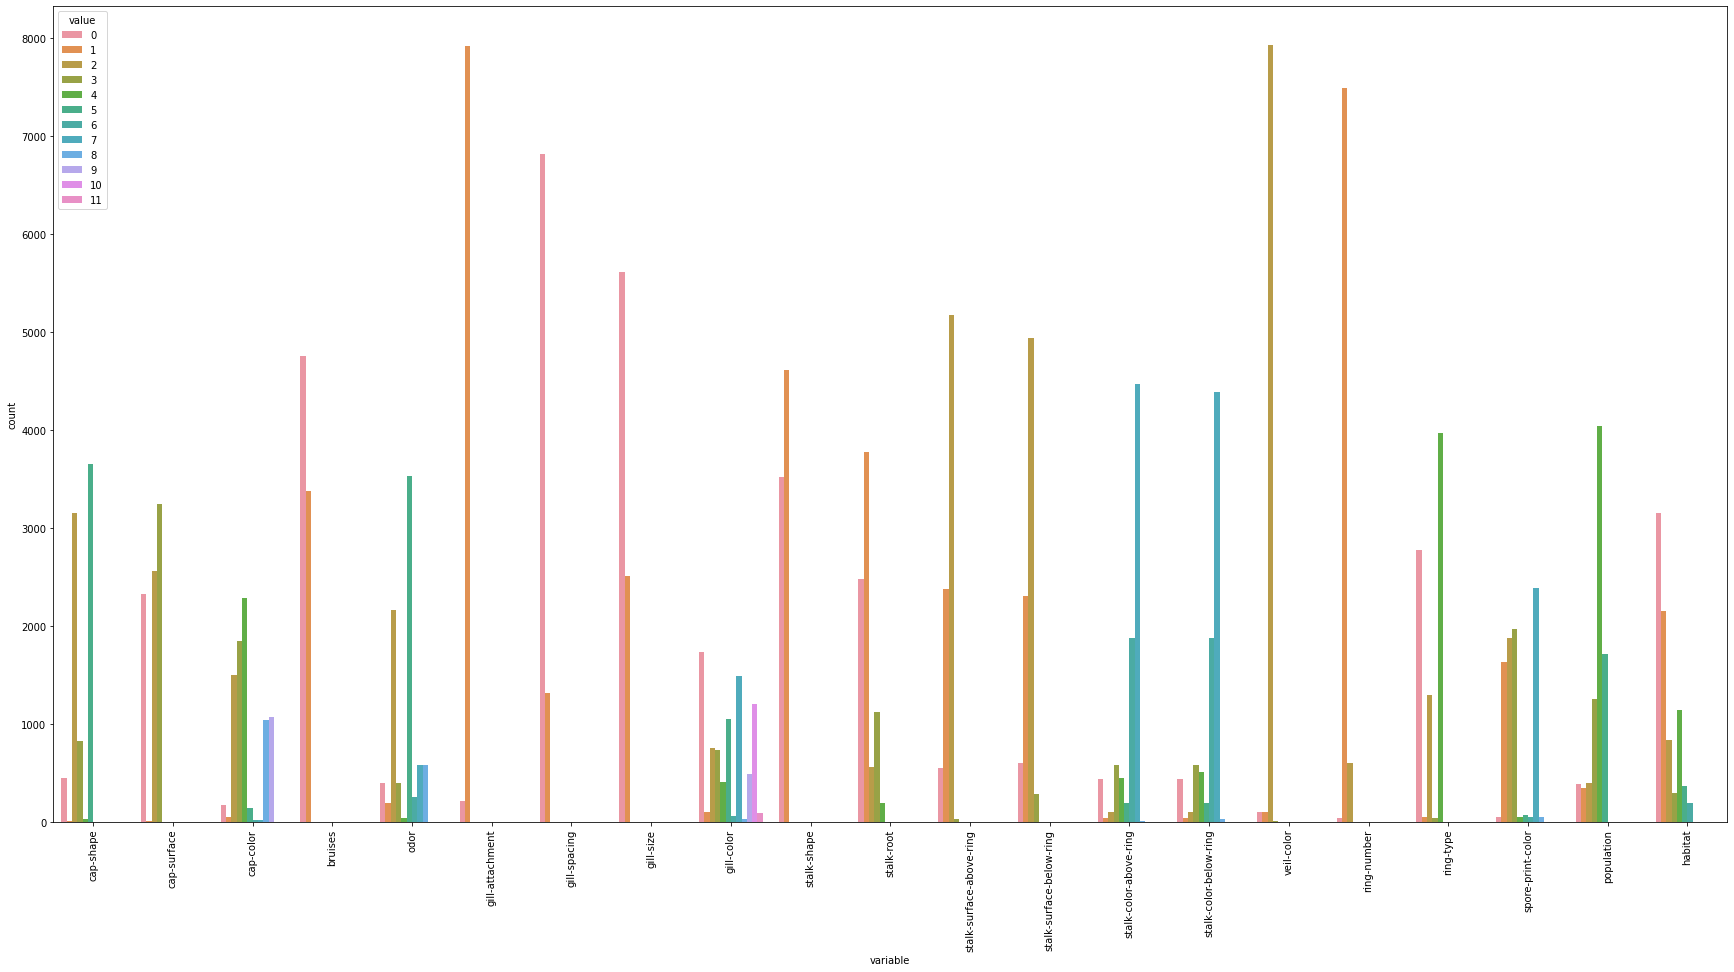

In [16]:
df = pd.melt(data.iloc[:,1:22])
fig=plt.figure(1, figsize=(30,15))
ax=fig.add_subplot(111)
sns.countplot(ax=ax, data=df.loc[df['value']!="NO"], x='variable', hue='value')
plt.xticks(rotation = 90, fontsize = 10)

##Mean Value of the features

(array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <a list of 8 Text major ticklabel objects>)

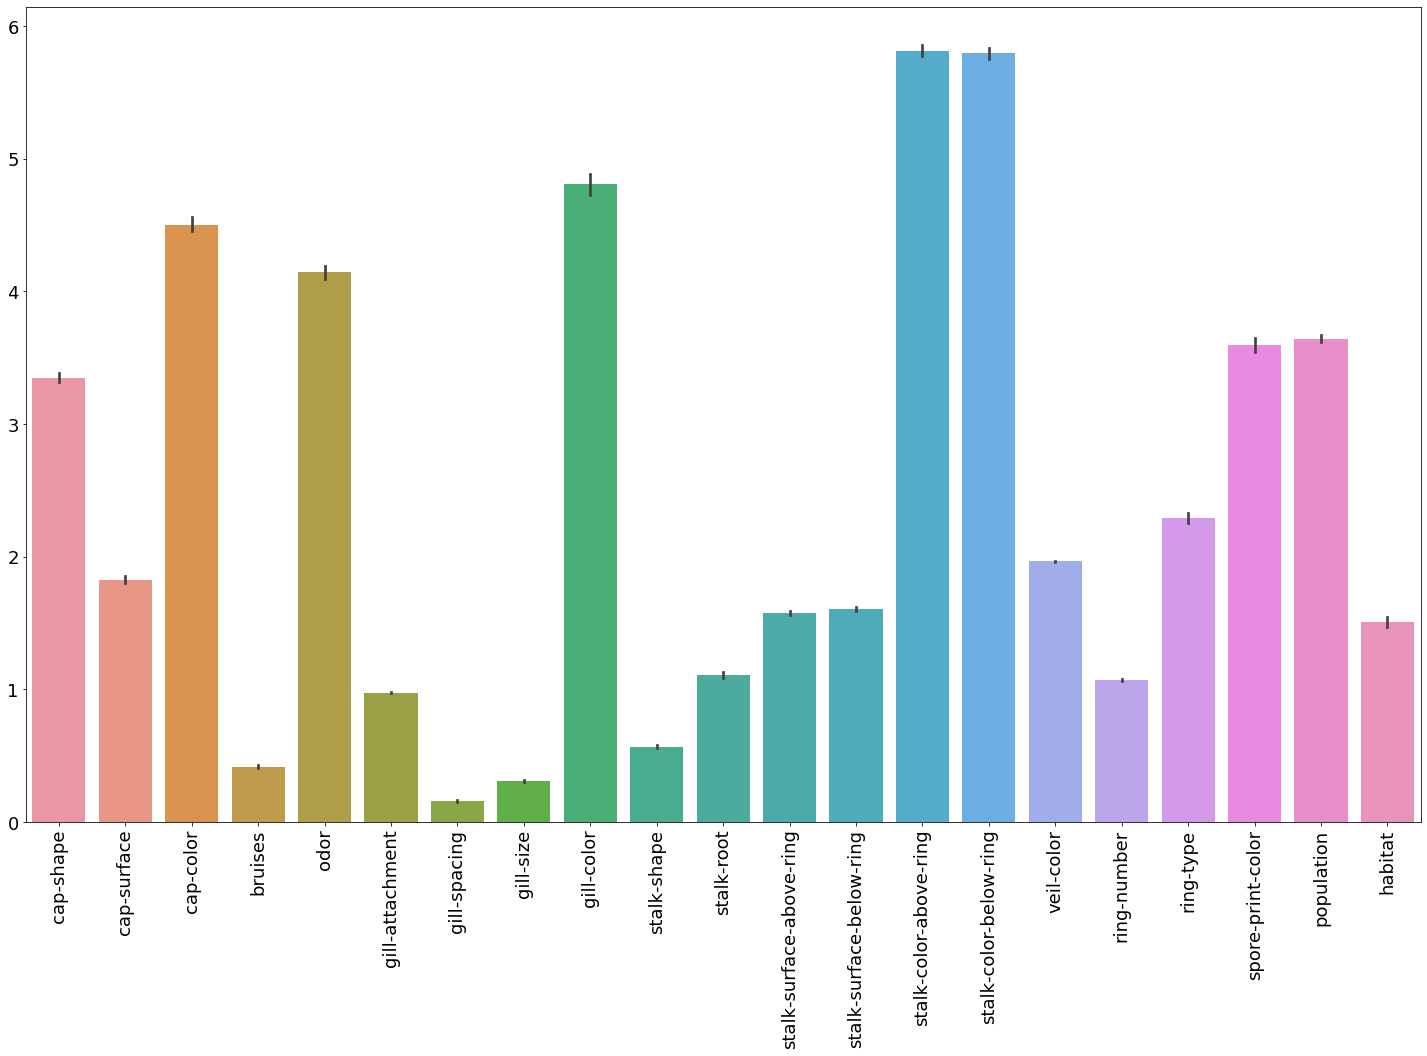

In [17]:
cols = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.barplot(data=data[cols])
plt.xticks(np.arange(0,21), labels=cols, rotation=90, fontsize=18)
plt.yticks(fontsize=18)

##Correlation plot

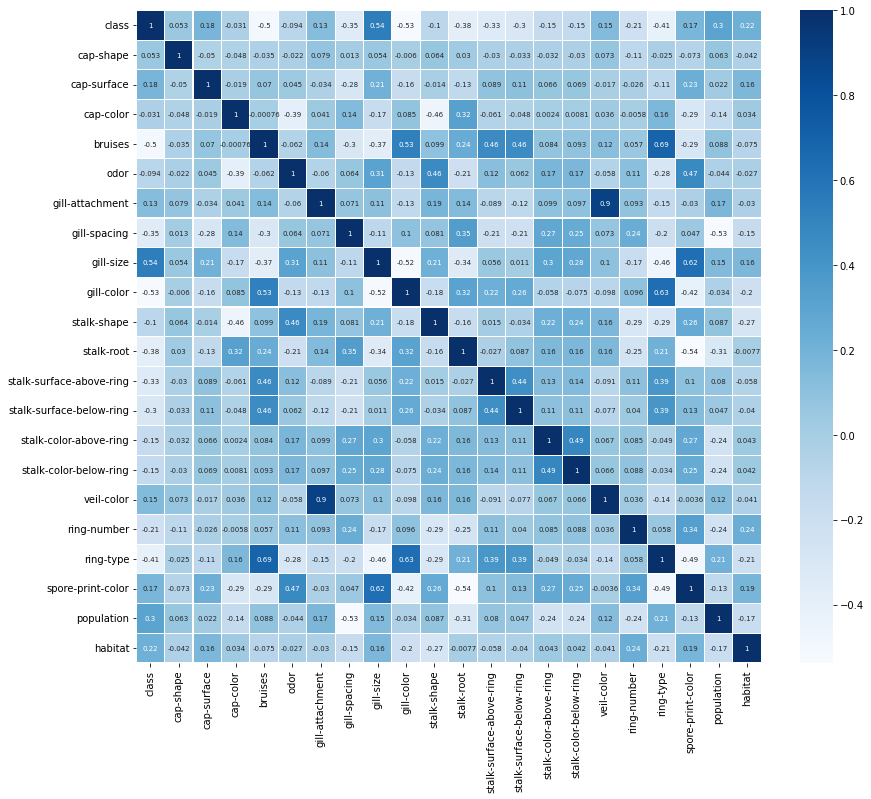

In [18]:
plt.figure(figsize=(14,12))
sns.heatmap(data.corr(),linewidths=.1,cmap="Blues", annot=True, annot_kws={"size": 7})
plt.yticks(rotation=0);

##Splitting into Train and Test

In [19]:
X = data.drop(['class'], axis=1)  
Y = data["class"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1)   

##Feature Importance

In [20]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X,Y)
feature_imp = pd.DataFrame(clf.feature_importances_,index=X.columns)
feature_imp.sort_values(by = 0 , ascending = False)

,0
odor,0.193864
gill-size,0.122106
gill-color,0.122106
spore-print-color,0.078193
ring-type,0.063948
stalk-root,0.060066
stalk-surface-above-ring,0.057233
gill-spacing,0.049068
population,0.047956
bruises,0.042902


#Classification Models

##Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter = 500)
LR.fit(X_train, Y_train)

LogisticRegression(max_iter=500)

In [22]:
y_pred_lr = LR.predict(X_test)

In [23]:
print(classification_report(Y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       820
           1       0.96      0.93      0.95       805

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625



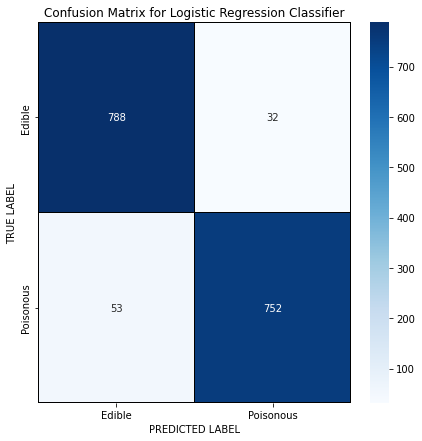

In [24]:
cm = confusion_matrix(Y_test, y_pred_lr)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

In [25]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, LR.predict_proba(X_test)[:, 1])

0.9815028026056658

##Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB
model_naive = GaussianNB()
model_naive.fit(X_train, Y_train)

GaussianNB()

In [27]:
y_pred_nb = model_naive.predict(X_test)

In [28]:
print(classification_report(Y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       820
           1       0.92      0.91      0.92       805

    accuracy                           0.92      1625
   macro avg       0.92      0.92      0.92      1625
weighted avg       0.92      0.92      0.92      1625



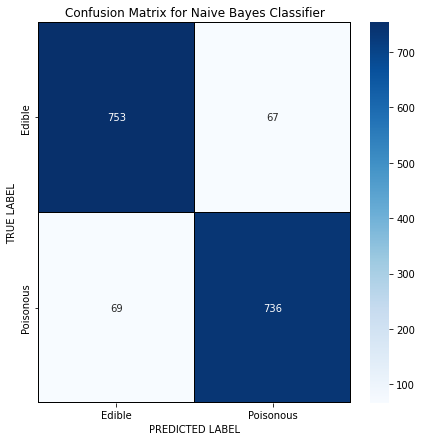

In [29]:
cm = confusion_matrix(Y_test, y_pred_nb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes Classifier')
plt.show()

In [30]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, model_naive.predict_proba(X_test)[:, 1])

0.9434722011816391

##Decision Trees

In [31]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)

DecisionTreeClassifier()

In [32]:
y_pred_dt = dt.predict(X_test)

In [33]:
print(classification_report(Y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



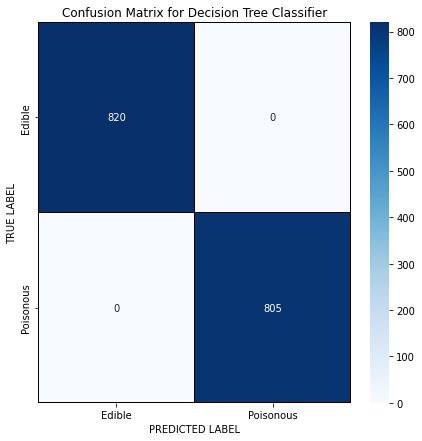

In [34]:
cm = confusion_matrix(Y_test, y_pred_dt)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [35]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test, dt.predict_proba(X_test)[:, 1])

1.0

In [36]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, Y_train)

RandomForestClassifier()

In [37]:
y_pred_rf = RF.predict(X_test)

In [38]:
print(classification_report(Y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



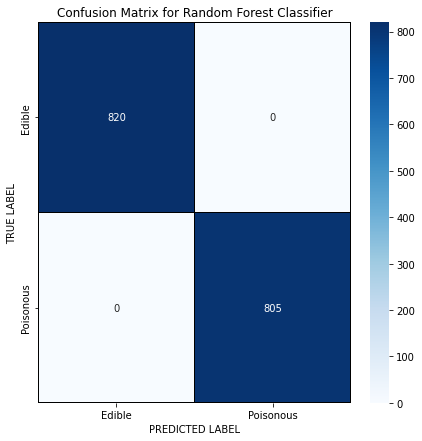

In [39]:
cm = confusion_matrix(Y_test, y_pred_rf)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [40]:
roc_auc_score(Y_test, RF.predict_proba(X_test)[:, 1])

1.0

In [41]:
import xgboost as xgb
from xgboost import XGBClassifier

In [42]:
xgbc = XGBClassifier(n_estimators=100, learning_rate=0.1)
xgbc.fit(X_train, Y_train)

XGBClassifier()

In [43]:
y_pred_xgb = xgbc.predict(X_test)

In [44]:
print(classification_report(Y_test, y_pred_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00       805

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



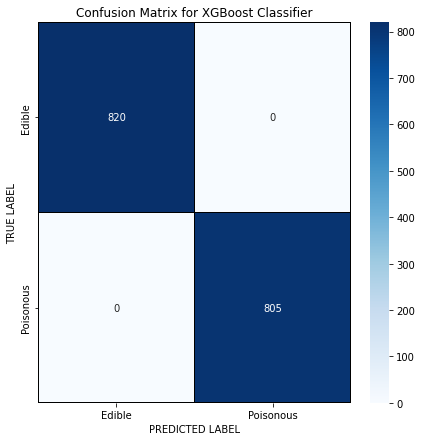

In [45]:
cm = confusion_matrix(Y_test, y_pred_xgb)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for XGBoost Classifier')
plt.show()

In [46]:
roc_auc_score(Y_test, xgbc.predict_proba(X_test)[:, 1])

1.0

##**Summary of AU-ROC and Accuracy scores for test set for 5  different Classification Models**

In [47]:
from tabulate import tabulate
table = [['S.No', 'Classification Model', 'Accuracy Score', 'AU-ROC Score'], [1, 'XGBoost', 1.00, 1.00], [2, 'Random Forest', 1.00, 1.00], [3, 'Decision Tree', 1.00, 1.00], [4, 'Logistic Regression', 0.95, 0.98], [5, 'Naive Bayes', 0.92, 0.94]]

In [48]:
print(tabulate(table, headers='firstrow', tablefmt='fancy_grid'))

╒════════╤════════════════════════╤══════════════════╤════════════════╕
│   S.No │ Classification Model   │   Accuracy Score │   AU-ROC Score │
╞════════╪════════════════════════╪══════════════════╪════════════════╡
│      1 │ XGBoost                │             1    │           1    │
├────────┼────────────────────────┼──────────────────┼────────────────┤
│      2 │ Random Forest          │             1    │           1    │
├────────┼────────────────────────┼──────────────────┼────────────────┤
│      3 │ Decision Tree          │             1    │           1    │
├────────┼────────────────────────┼──────────────────┼────────────────┤
│      4 │ Logistic Regression    │             0.95 │           0.98 │
├────────┼────────────────────────┼──────────────────┼────────────────┤
│      5 │ Naive Bayes            │             0.92 │           0.94 │
╘════════╧════════════════════════╧══════════════════╧════════════════╛


## XGBoost, Random Forest and Decision Tree models are giving us best Accuracy and AU-ROC score